# Titanic Survival Prediction

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline

import itertools
import pickle

%matplotlib inline
sns.set_theme(style="darkgrid")

## import dataset

In [2]:
df = pd.read_csv('titanic_dataset.csv', index_col = 'PassengerId')

## Explore data

In [3]:
df.sample(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
1061,1,3,"Hellstrom, Miss. Hilda Maria",female,22.0,0,0,7548,8.9625,NaN,S
1194,0,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S


In [4]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.shape

(1309, 11)

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
for col in df.columns:
    print(col, 'unique values :', df[col].nunique())

Survived unique values : 2
Pclass unique values : 3
Name unique values : 1307
Sex unique values : 2
Age unique values : 98
SibSp unique values : 7
Parch unique values : 8
Ticket unique values : 929
Fare unique values : 281
Cabin unique values : 186
Embarked unique values : 3


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## clean data

In [11]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [12]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [13]:
df.isnull().sum()
#we will replace the NaN values in these features after undeerstanding the pattern of data in respective features

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### plot data

In [14]:
#countplot: for comparison of discrete classes against categorical features

def count(feature, x_label=None, y_label=None, title=None):
    sns.countplot(x=feature, hue='Survived', data=df, palette='rainbow')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [15]:
#histogram: for comparison of discrete classes against continuous (numerical) features

def hist(feature,bin_size=None):
    ax = df[feature].hist(bins=bin_size, density=True, stacked=True, color='teal')
    ax.set(xlabel=feature)
    plt.show()

In [16]:
cols = list(df.columns)

In [17]:
cols

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

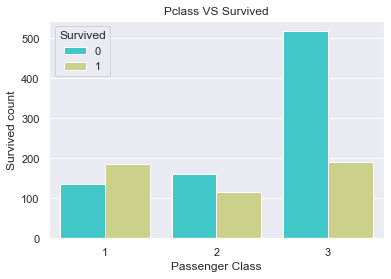

So, being a first class passenger naturally gives a better chance of survival


In [18]:
#feature: Pclass

count('Pclass', 'Passenger Class', 'Survived count', 'Pclass VS Survived')
print('So, being a first class passenger naturally gives a better chance of survival')

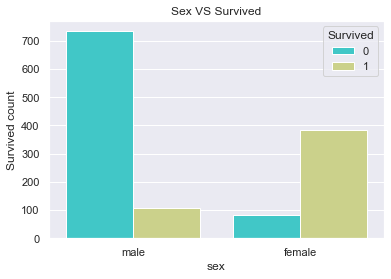

this suggests women have better chance of survival.
(because : 'woman' and 'children' first)


In [19]:
#feature: Sex

count('Sex', 'sex', 'Survived count', 'Sex VS Survived')
print('this suggests women have better chance of survival.\n(because : \'woman\' and \'children\' first)')

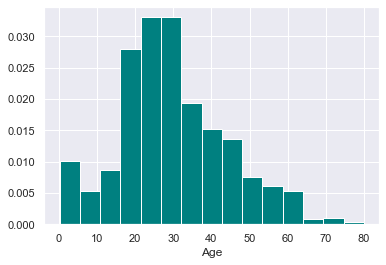

Since 'Age' is skewed, replacing it with the mean value might give biased result.
So we will replace the missing values 'Age' with the median.


In [20]:
#feature: Age

hist('Age', bin_size=15)
print('Since \'Age\' is skewed, replacing it with the mean value might give biased result.\nSo we will replace the missing values \'Age\' with the median.')

In [21]:
print('Number of missing values in \'Age\' :', df['Age'].isnull().sum())

Number of missing values in 'Age' : 263


In [22]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [23]:
print('Number of missing values in \'Age\' :', df['Age'].isnull().sum())

Number of missing values in 'Age' : 0


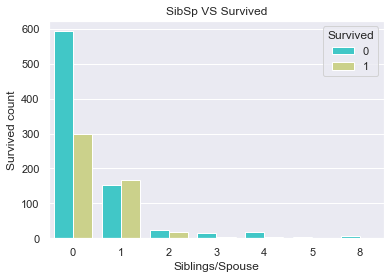

In [24]:
#feature: SibSp

count('SibSp', 'Siblings/Spouse', 'Survived count', 'SibSp VS Survived')

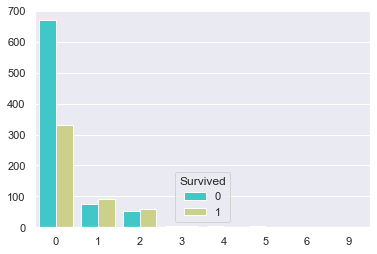

In [25]:
#feature: Parch

count('Parch')

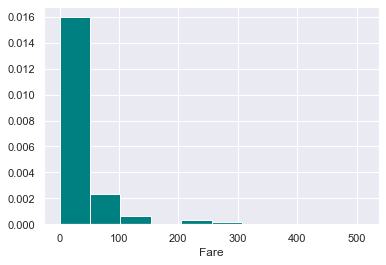

In [26]:
#feature: Fare

hist('Fare', bin_size=10)

In [27]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

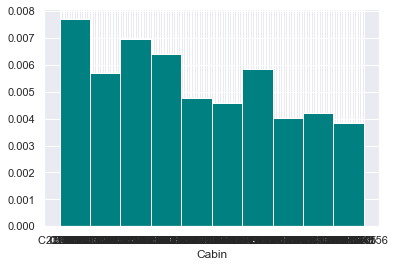

In [28]:
hist('Cabin')

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: Embarked, dtype: int64


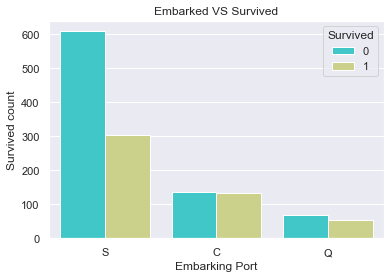

In [29]:
#feature: Embarked

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())

count('Embarked', 'Embarking Port', 'Survived count', 'Embarked VS Survived')

In [30]:
df['Embarked'].fillna('S', inplace=True)

In [31]:
#feature: Cabin
#'Cabin' is a categorical feature, but has too many classes to plot a countplot or barplot

In [32]:
#print(df['Cabin'].value_counts())

print('Percent missing values of "Cabin" is %.2f%%' %(df['Cabin'].isnull().sum()/len(df['Cabin'])*100))
print('So we drop this feature')

df.drop('Cabin', axis=1, inplace=True)

Percent missing values of "Cabin" is 77.46%
So we drop this feature


In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Feature Engineering

In [34]:
#create a new feature 'is_minor' based on 'Age'
df['is_minor'] = (df['Age']<18) * 1

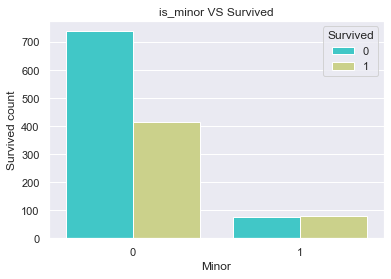

This suggests Minors have better chance of survival than those over the age of 18


In [35]:
count('is_minor', 'Minor', 'Survived count', 'is_minor VS Survived')
print('This suggests Minors have better chance of survival than those over the age of 18')

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'is_minor'],
      dtype='object')

In [37]:
#let us explore this further: by creating a new feature 'travelling_alone'

travelling_alone = (df['SibSp']==0)*1
travelling_alone.rename('travelling_alone')

df = pd.concat([df, travelling_alone], axis=1)
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'is_minor', 'travelling_alone']

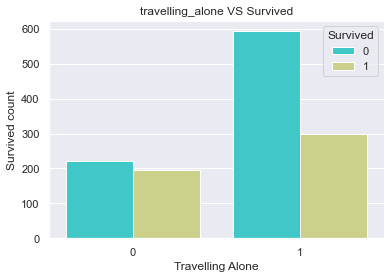

This suggests travelling with someone decreases chances of survival


In [38]:
#feature: travelling_alone

count('travelling_alone', 'Travelling Alone', 'Survived count', 'travelling_alone VS Survived')

print('This suggests travelling with someone decreases chances of survival')

In [39]:
#According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family.
#so for simplicity and to avoid multicollinearity, we drop 'Parch' and 'SibSp'

df.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)

In [40]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,is_minor,travelling_alone
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,0,0
2,1,1,female,38.0,71.2833,C,0,0


In [41]:
#Dummy Variables ('Pclass', 'Sex', 'Embarked')

cleaned_data = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'])
cleaned_data.drop(columns=['Sex_female', 'Pclass_3', 'Embarked_Q'], inplace=True)
cleaned_data

,Survived,Age,Fare,is_minor,travelling_alone,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,7.2500,0,0,0,0,1,0,1
2,1,38.0,71.2833,0,0,1,0,0,1,0
3,1,26.0,7.9250,0,1,0,0,0,0,1
4,1,35.0,53.1000,0,0,1,0,0,0,1
5,0,35.0,8.0500,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,0,28.0,8.0500,0,1,0,0,1,0,1
1306,1,39.0,108.9000,0,1,1,0,0,1,0
1307,0,38.5,7.2500,0,1,0,0,1,0,1


## Data Standardization

In [42]:
scaler = StandardScaler()

In [43]:
cleaned_data[['Age', 'Fare']] = scaler.fit_transform(cleaned_data[['Age', 'Fare']])

## final data

In [44]:
X = cleaned_data.copy()
X.drop(columns=['Survived'], inplace=True)

y = cleaned_data['Survived']

## train test split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model training and Predict result

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
#predict() to predict classification of sample data into discrete classes
y_pred = model.predict(x_test)

In [48]:
#predict_proba() to return the probability of each sample data belonging to each class P(Y=0|x), P(Y=1|x),..
y_pred_probability = model.predict_proba(x_test)[:, 1]

## Model Evaluation

### Jaccard Index

In [49]:
jaccard_index = jaccard_score(y_test, y_pred)
print('Jaccard Index score :', jaccard_index)

Jaccard Index score : 0.6574074074074074


### Log Loss

In [50]:
print('Log Loss :', log_loss(y_test, y_pred_probability))

Log Loss : 0.3557920596632291


### Confusion Matrix

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

In [52]:
cnf_matrix

array([[ 71,  21],
       [ 16, 154]], dtype=int64)

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 71  21]
 [ 16 154]]


Confusion matrix, without normalization
[[ 71  21]
 [ 16 154]]


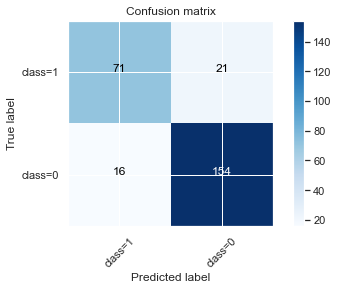

In [54]:
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

### Accuracy, Precision, Recall, F-measure and Support

In [55]:
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.8587786259541985


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       170
           1       0.82      0.77      0.79        92

    accuracy                           0.86       262
   macro avg       0.85      0.84      0.84       262
weighted avg       0.86      0.86      0.86       262



### ROC curve and AUC ROC

In [57]:
y_test.shape

(262,)

In [58]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
print('Logistic Regression AUC is ', logit_roc_auc)

Logistic Regression AUC is  0.8388107416879796


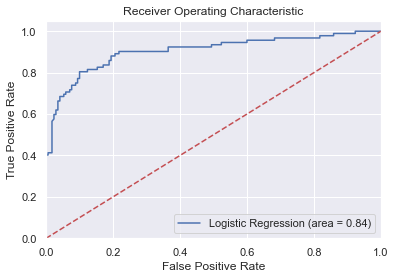

In [59]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model evaluation using Cross Validation

In [60]:
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

print('K-Fold cross-validation results :')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-Fold cross-validation results :
LogisticRegression average accuracy: 0.855 (+/-0.094)
LogisticRegression average log_loss: 0.390 (+/-0.128)
LogisticRegression average auc: 0.891 (+/-0.072)


## GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

In [61]:
#Define simple model
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
std_scale = StandardScaler(with_mean=False, with_std=False)

#Defining the CV method: Using the Repeated Stratified K Fold
n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

model = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

model.fit(X, y)
results = model.cv_results_

print("best params: " + str(model.best_estimator_))
print("best params: " + str(model.best_params_))
print('best score:', model.best_score_)

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.8000100000000003))])
best params: {'clf__C': 2.8000100000000003}
best score: 0.8546933403527243


<ipython-input-62-064a0acbdf04>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


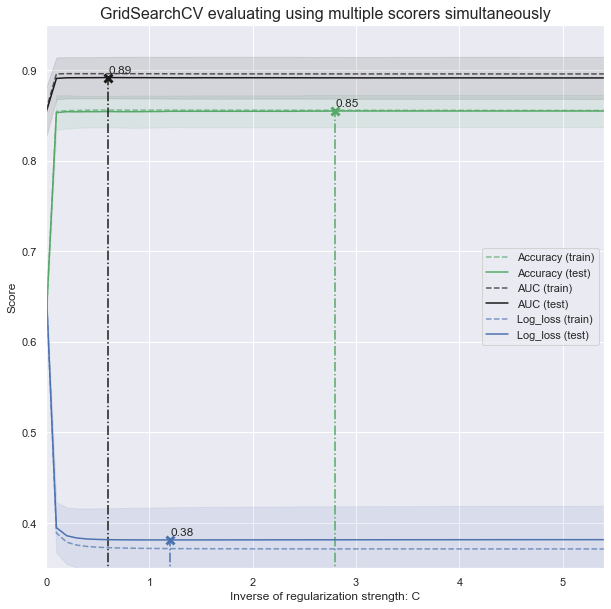

In [62]:
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

`model` **is the Model trained with the entire dataset and best parameters**

## Serialize final Machine Learning model

In [63]:
#train the model (pipeline) with entire dataset and serialize it 

model.fit(X, y)

pickle_filename = 'titanic_survival_prediction.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(model, file)

## Deserialize the Machine Learningmodel to predict results of new data

`new_data` is the data (pandas DataFrame) for which we need to predict outcome<br>
So, to predict new outcome, just deserialize the trained and ready-to-use Machine Learning model and feed the `new_data` to this model

In [64]:
# Load the Model back from file
with open('titanic_survival_prediction.pkl', 'rb') as file:  
    model = pickle.load(file)

## predicting result of new data

In [ ]:
#import fresh data 
new_data = pd.read_csv('fresh_data_from_production.csv') 

In [ ]:
result = model.predict(new_data[selected_features])

predicted = pd.concat(new_data['PassengerId'], pd.Series(result), axis=1)